Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 697s 14ms/step - loss: 1.5378 - acc: 0.4409 - val_loss: 1.2380 - val_acc: 0.5500
Epoch 2/50
50000/50000 [==============================] - 715s 14ms/step - loss: 1.1234 - acc: 0.6018 - val_loss: 0.9561 - val_acc: 0.6632
Epoch 3/50
50000/50000 [==============================] - 651s 13ms/step - loss: 0.9731 - acc: 0.6580 - val_loss: 0.8971 - val_acc: 0.6829
Epoch 4/50
50000/50000 [==============================] - 343s 7ms/step - loss: 0.8834 - acc: 0.6894 - val_loss: 0.8035 - val_acc: 0.7210
Epoch 5/50
50000/50000 [==============================] - 343s 7ms/step - loss: 0.8182 - acc: 0.7132 - val_loss: 0.7476 - val_acc: 0.7391
Epoch 6/50
50000/50000 [==============================] - 339s 7ms/step - loss: 0.7718 - acc: 0.7303 - val_loss: 0.7281 - val_acc: 0.7461
Epoch 7/50
50000/50000 [==============================] - 362s 7ms/step - loss: 0.7318 - acc: 0.7438 - val_loss: 0.7086

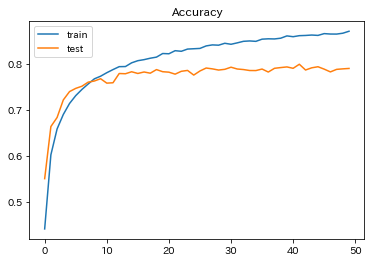

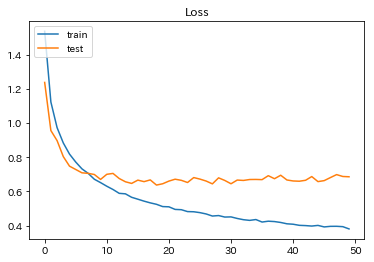

In [3]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# データを読み込む --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを正規化 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルを定義 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# モデルをコンパイル --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*7)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [5]:
model.save_weights('cifar10-cnn-weight.h5')